# Liver Disorder Data
The first five variables are blood tests which are thought to be sensitive to liver disorders that may arise due to alcohol consumption. We are trying to predict how many alcoholic beverages a person is consuming per day based on their blood work.

# Importing Data Set and Libraries


In [1]:
import pandas as pd
from sklearn.linear_model import SGDRegressor
from statsmodels.api import OLS
import seaborn as sns

url = 'https://raw.githubusercontent.com/kyliequinney/Liver-Disease-Data/main/data.csv'
data = pd.read_csv(url)
df = pd.DataFrame(data)
df.head()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


# Data Preprocessing

In [2]:
# check for null values
df.isnull().sum()

# check for missing data
df.isna().sum()

# check for inconsistencies (?)

# removing redundant rows
df.shape
df.drop_duplicates(inplace=True) #there were 4 redundant rows
df.shape

(341, 7)

In [3]:
# obtain output summary of attributes. Are the attributes normally distributed? If not, what could be the reason?
df.describe()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,90.120235,69.891496,30.513196,24.662757,38.401760,3.431085,1.583578
std,4.452385,18.431988,19.586249,10.115541,39.439379,3.341640,0.493690
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000,1.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000,1.000000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000,2.000000
75%,92.000000,80.000000,34.000000,27.000000,46.000000,5.000000,2.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000,2.000000


In [4]:
# standardize and normalize the attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = df['drinks']
X = df.drop('drinks', axis=1)
X_scaled = scaler.fit_transform(X)

In [5]:
# After scaling X, the columns should now have mean of 0 and variance of 1
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.describe()

,mcv,alkphos,sgpt,sgot,gammagt,selector
count,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02
mean,-9.741312e-16,5.209258e-17,5.209258e-17,-1.146037e-16,7.292961e-17,1.041852e-16
std,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00
min,-5.650263e+00,-2.547767e+00,-1.355653e+00,-1.946673e+00,-8.481585e-01,-1.183811e+00
25%,-7.018305e-01,-7.004366e-01,-5.886842e-01,-5.606302e-01,-5.942322e-01,-1.183811e+00
50%,-2.704422e-02,-1.571043e-01,-2.307654e-01,-1.646180e-01,-3.403059e-01,8.447294e-01
75%,4.228133e-01,5.492277e-01,1.782846e-01,2.313943e-01,1.929393e-01,8.447294e-01
max,2.897030e+00,3.700555e+00,6.365167e+00,5.676563e+00,6.566489e+00,8.447294e-01


<Axes: >

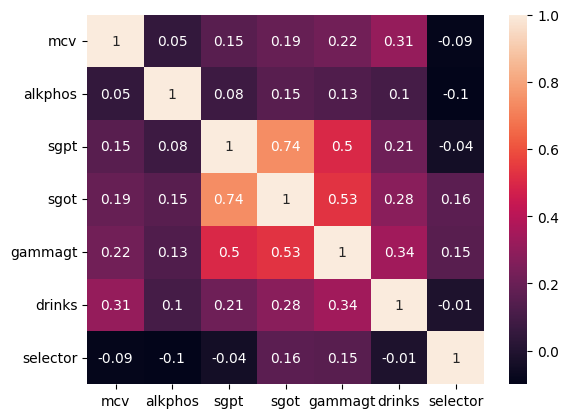

In [6]:
# Find how the attributes are correlated to each other and the target variable. Perform
# numerical and visual analysis and output plots and results.
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

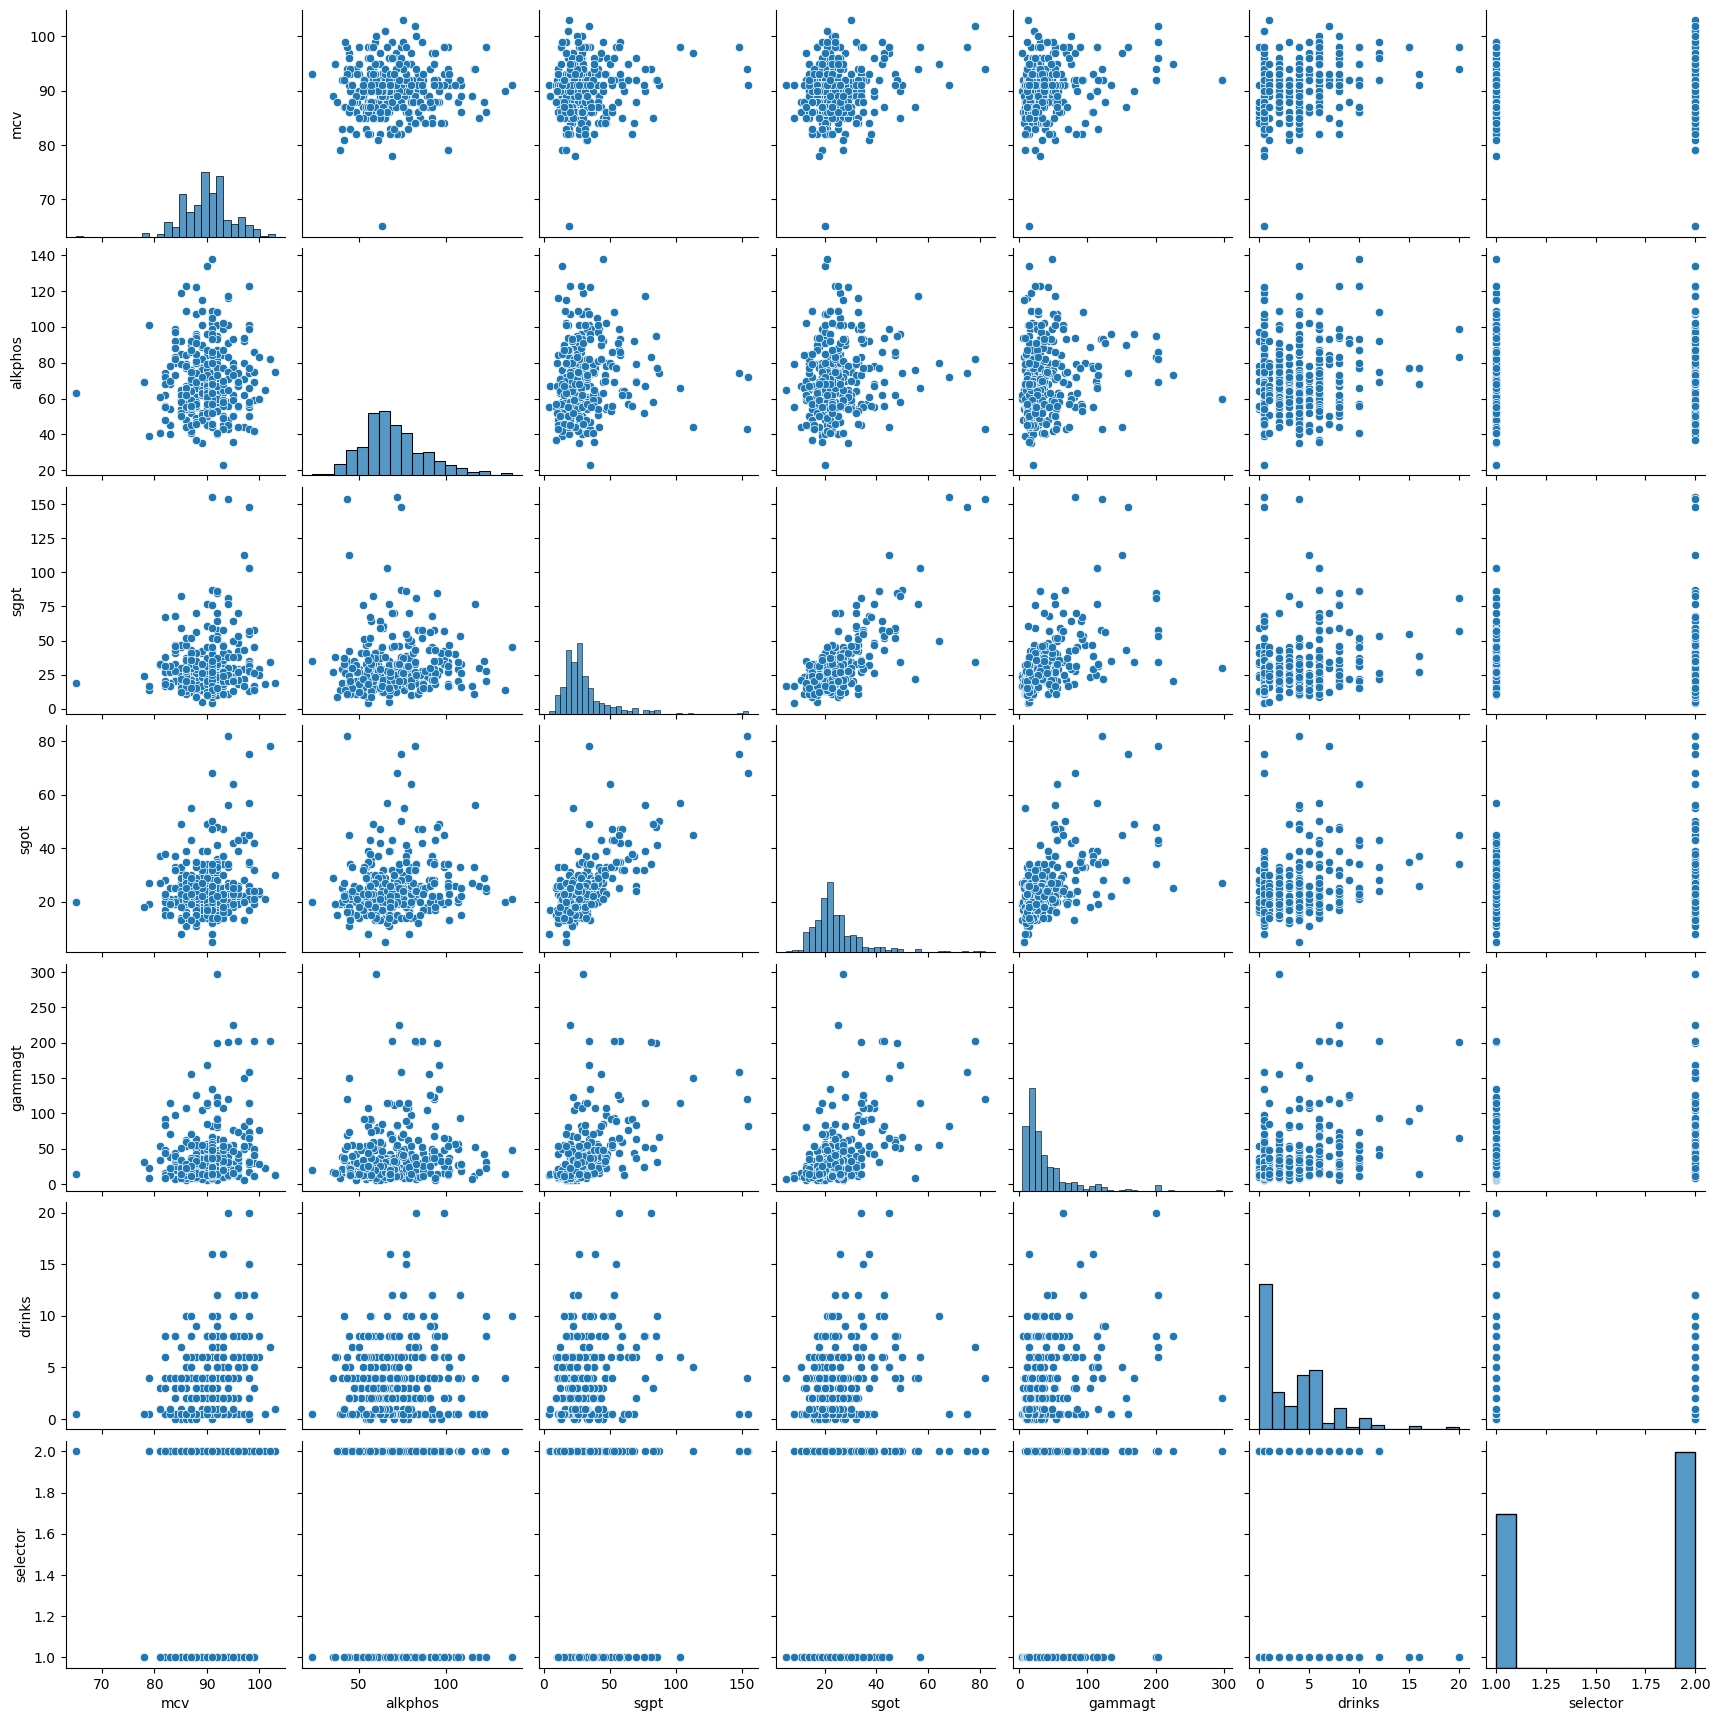

In [7]:
sns.pairplot(df)

In [8]:
# Identify a few important attributes and proceed forward. Do not use all attributes blindly.
features = ['mcv', 'sgot', 'gammagt']

<Axes: >

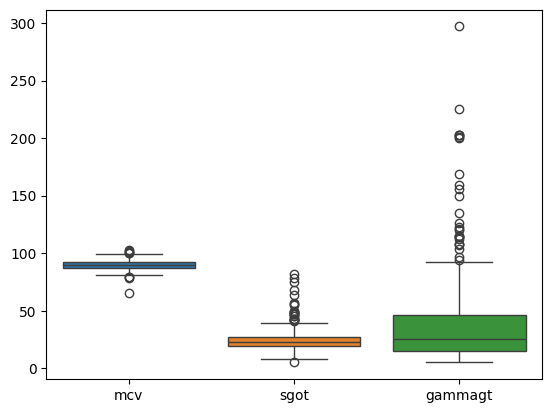

In [9]:
sns.boxplot(data=df[features])

In [10]:
X_scaled = X_scaled[features]

In [11]:
# split the data into testing and training parts (ratio is up to us)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)

In [12]:
X_train.shape, X_test.shape

((272, 3), (69, 3))

# Model Construction

In [13]:
# Model 1: using SGDRegressor library of sci-kit learn
from sklearn.linear_model import SGDRegressor

# required to tune hyper-parameters (learning rate, iterations...)
# keep log of different hyper-parameters used and results obtained

#Use GridSearchCV to determine the best parameters
from sklearn.model_selection import GridSearchCV
params = [{'max_iter' : [1000, 10000, 100000], 'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive'], 'alpha' : [0.001, 0.0001, 0.00001], 'tol' : [0.0001, 0.001, 0.01, 0.1]}]
my_grid = GridSearchCV(estimator = SGDRegressor(), param_grid=params, scoring = 'r2')
my_grid.fit(X_train, y_train)
print(my_grid.best_params_)

{'alpha': 0.0001, 'learning_rate': 'constant', 'max_iter': 10000, 'tol': 0.01}


In [14]:
# Be sure to output as many result metrics as possible such as training and test error and accuracy, R-squared statistic, etc.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
#test training error

sgd = SGDRegressor(max_iter=1000, learning_rate = 'invscaling', alpha = 0.00001, tol = 0.001, random_state = 3)
sgd.fit(X_train, y_train)

y_pred_train = sgd.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
ev_train = explained_variance_score(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print('MSE Train:', mse_train)
print('MAE Train:', mae_train)
print('EV Train:', ev_train)
print('R2 Train:', r2_train)
print('Score Train:', sgd.score(X_train, y_train))
print(sgd.coef_)

MSE Train: 9.547348939359688
MAE Train: 2.339358298250774
EV Train: 0.1971625190569012
R2 Train: 0.19716206688307059
Score Train: 0.19716206688307059
[0.7732831  0.24685804 0.91934473]


In [15]:
#test testing error

y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('MAE:', mae)
print('EV:', ev)
print('R2:', r2)
print('score:', sgd.score(X_test, y_test))
print(sgd.coef_)

MSE: 7.3499739880117065
MAE: 2.3650460852471693
EV: 0.10100685046118296
R2: 0.09756615071180397
score: 0.09756615071180397
[0.7732831  0.24685804 0.91934473]


In [16]:
# Model 2: using OLS library of stats models
import statsmodels.api as sm
y = df['drinks']
X = df.drop('drinks', axis=1)
features = ['mcv', 'sgot', 'gammagt']
X = X[features]
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)
model = sm.OLS(y, X).fit()
print(model.summary())
# output the model summary and interpret and explain all of the output diagnostics, such as coef, standard error, t-value,
# p-value, R-squared, R-squared adjusted, F-statistic, etc

                            OLS Regression Results                            
Dep. Variable:                 drinks   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     25.37
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           8.04e-15
Time:                        22:11:40   Log-Likelihood:                -860.05
No. Observations:                 341   AIC:                             1728.
Df Residuals:                     337   BIC:                             1743.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.1945      3.386     -4.192      0.0